In [7]:
import numpy as np
import matplotlib.pyplot as plt

def visualize_npy(file_path):
    """
    Visualizes the data stored in a .npy file.
    
    Parameters:
        file_path (str): Path to the .npy file.
        
    Returns:
        None
    """
    try:
        # Load the .npy file
        data = np.load(file_path)
        print(f"Data shape: {data.shape}")

        # Visualize based on the data's dimensions
        if data.ndim == 1:  # 1D array
            plt.plot(data)
            plt.title("1D Array Plot")
            plt.xlabel("Index")
            plt.ylabel("Value")
            plt.show()

        elif data.ndim == 2:  # 2D array
            plt.imshow(data, cmap='gray', aspect='auto')
            plt.colorbar()
            plt.title("2D Array Heatmap")
            plt.show()

        elif data.ndim == 3:  # 3D array
            # Example: Display slices along the first axis
            for i in range(data.shape[0]):
                plt.imshow(data[i], cmap='viridis')
                plt.colorbar()
                plt.title(f"Slice {i}")
                plt.show()

        else:
            print("Visualization is not supported for arrays with dimensions higher than 3.")
    except Exception as e:
        print(f"An error occurred: {e}")

Data shape: (256, 256)


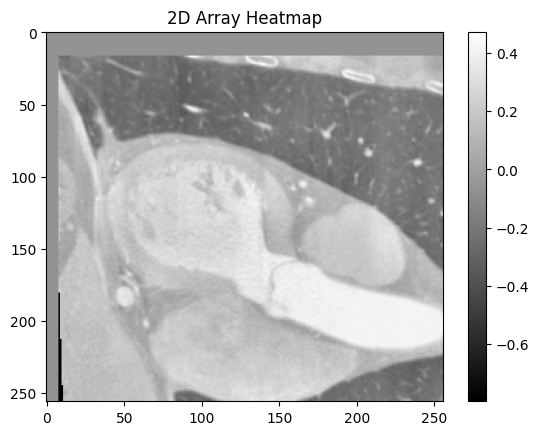

In [11]:
# train_ct

visualize_npy('data/data_np/train_ct/ct_train_slice900.npy')

Data shape: (256, 256)


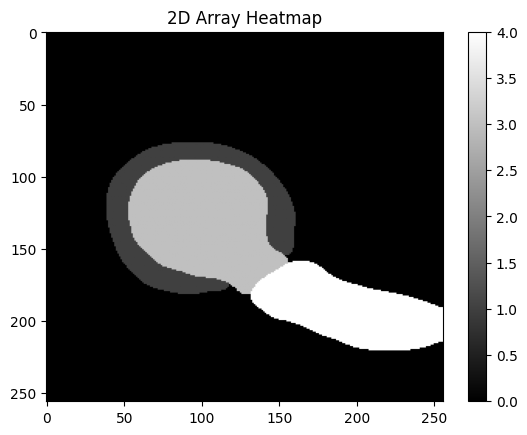

In [12]:
visualize_npy('data/data_np/gt_train_ct/ct_train_slice900_gt.npy')

Data shape: (256, 256)


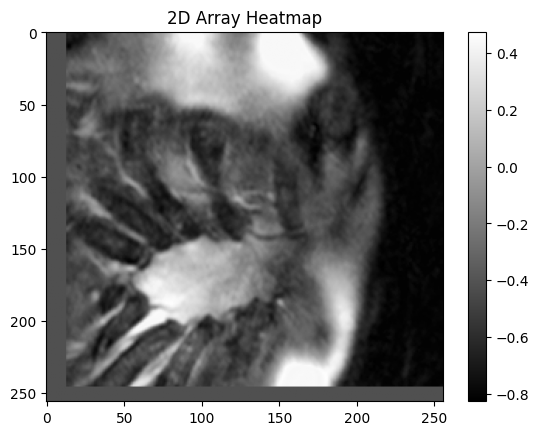

In [13]:
# train_mr

visualize_npy('data/data_np/train_mr/mr_train_slice900.npy')

Data shape: (256, 256)


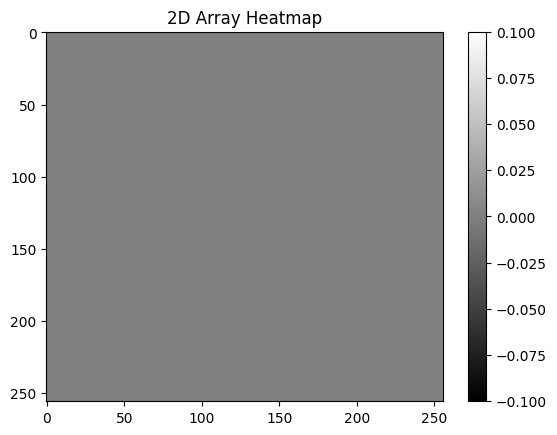

In [14]:
visualize_npy('data/data_np/gt_train_mr/mr_train_slice900_gt.npy')

## Dataloader Transformation (Source Domain)

In [112]:
# viz image func

import numpy as np
import matplotlib.pyplot as plt

# Define a colormap for the categories
cmap = plt.cm.get_cmap("tab10", 5)  # 5 discrete colors

def viz_array(input_arr):
    plt.figure(figsize=(6,6))
    plt.imshow(input_arr, cmap=cmap, interpolation='nearest')
    plt.axis("off")
    plt.show()

/tmp/ipykernel_9037/1040491521.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("tab10", 5)  # 5 discrete colors


In [126]:
#test image

import numpy as np

img_path = 'data/data_np/gt_train_ct/ct_train_slice400_gt.npy'
img = np.load(img_path)

In [127]:
img.shape # H*W

(256, 256)

In [128]:
# img = np.expand_dims(img, -1)
# img.shape

In [129]:
# img = np.tile(img, [1,1,3])
# img.shape

In [130]:
img

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(256, 256))

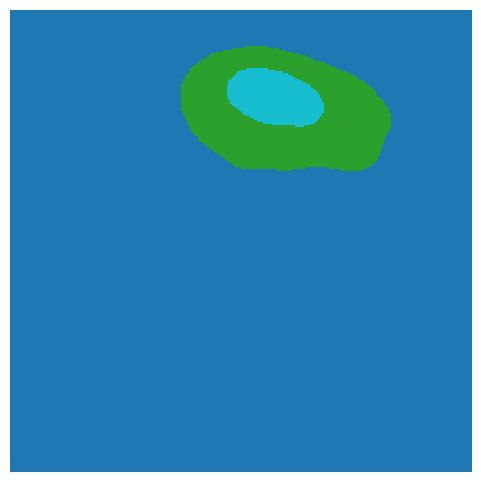

In [131]:
viz_array(img)

In [125]:
print(np.unique(img))

[0]


In [50]:
img = (img + 1) * 127.5

In [51]:
img

array([[[119.      , 119.      , 119.      ],
        [119.      , 119.      , 119.      ],
        [119.      , 119.      , 119.      ],
        ...,
        [120.0075  , 120.0075  , 120.0075  ],
        [118.94886 , 118.94886 , 118.94886 ],
        [120.77968 , 120.77968 , 120.77968 ]],

       [[119.      , 119.      , 119.      ],
        [119.      , 119.      , 119.      ],
        [119.      , 119.      , 119.      ],
        ...,
        [121.31535 , 121.31535 , 121.31535 ],
        [121.37268 , 121.37268 , 121.37268 ],
        [124.74791 , 124.74791 , 124.74791 ]],

       [[119.      , 119.      , 119.      ],
        [119.      , 119.      , 119.      ],
        [119.      , 119.      , 119.      ],
        ...,
        [122.620056, 122.620056, 122.620056],
        [123.21544 , 123.21544 , 123.21544 ],
        [124.13547 , 124.13547 , 124.13547 ]],

       ...,

       [[119.      , 119.      , 119.      ],
        [119.      , 119.      , 119.      ],
        [119.      , 1

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [50.04976..185.26746].


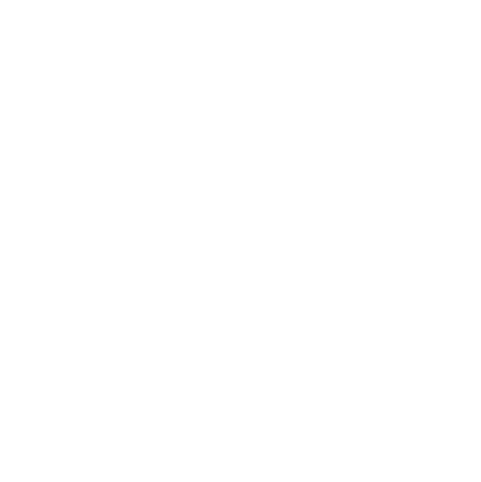

In [52]:
viz_array(img)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [50.04976..185.26746].


(256, 256, 3)


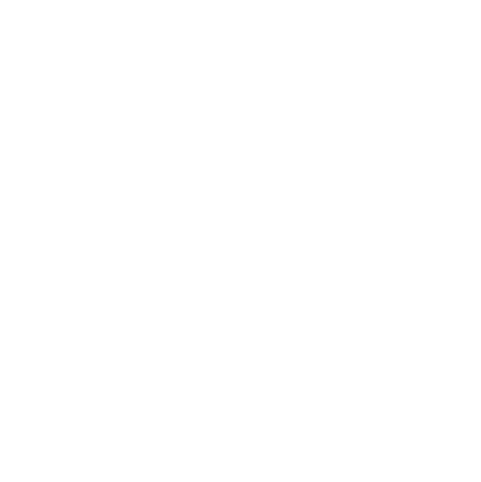

In [53]:
img = img[:, :, ::-1].copy()
print(img.shape)
viz_array(img)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-72.62916..81.26047].


(256, 256, 3)


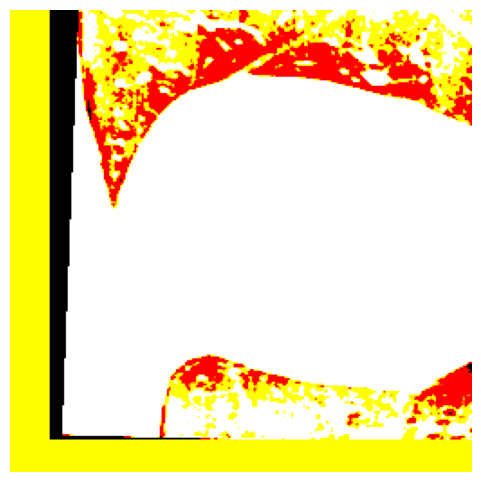

In [54]:
img_mean = np.array((104.00698793, 116.66876762, 122.67891434), dtype=np.float32)
img -= img_mean
print(img.shape)
viz_array(img)

## Dataloader Transformation (Target Domain)

In [63]:
from torchvision import transforms
from PIL import Image

transform_aug = transforms.Compose([transforms.ColorJitter(brightness=0.9, contrast=0.9, saturation=0.9, hue=0.5),
    transforms.RandomGrayscale(p=0.4)])

In [64]:
img_mean = np.array((104.00698793, 116.66876762, 122.67891434), dtype=np.float32)

In [65]:
import numpy as np

img_path = 'data/data_np/train_ct/ct_train_slice27.npy'
img = np.load(img_path)

<PIL.Image.Image image mode=RGB size=256x256 at 0x7EFEF9BBF220>


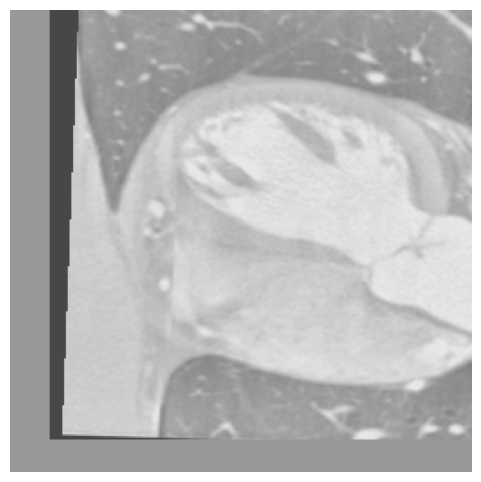

After transforms augmentation shape:  (256, 256, 3)
(256, 256, 3)
(3, 256, 256)
<PIL.Image.Image image mode=RGB size=256x256 at 0x7EFEF9C9E290>


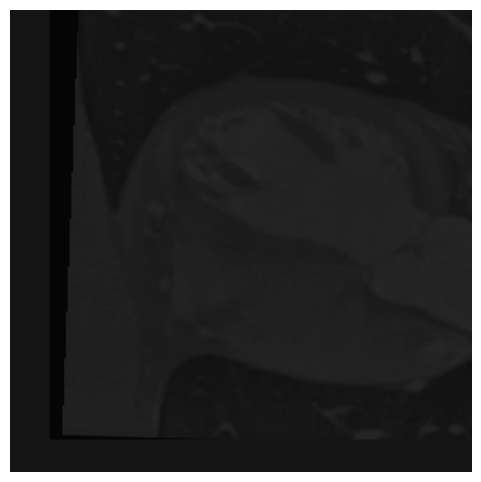

After transforms augmentation shape:  (256, 256, 3)
(256, 256, 3)
(3, 256, 256)
<PIL.Image.Image image mode=RGB size=256x256 at 0x7EFEF9C1C670>


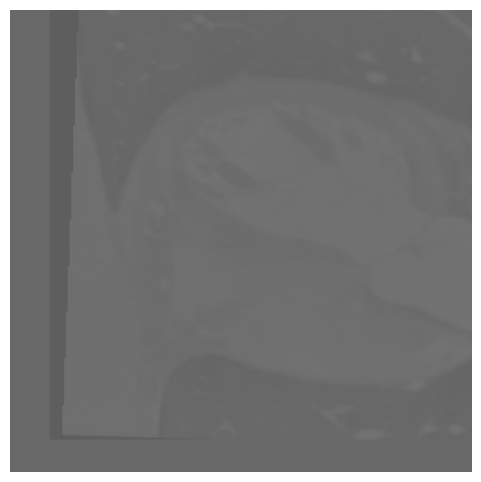

After transforms augmentation shape:  (256, 256, 3)
(256, 256, 3)
(3, 256, 256)
<PIL.Image.Image image mode=RGB size=256x256 at 0x7EFEF9C9E890>


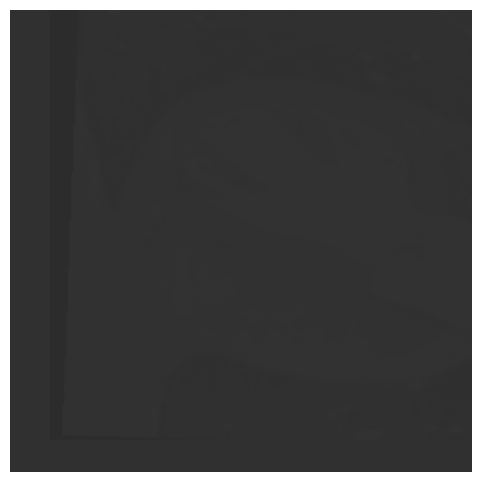

After transforms augmentation shape:  (256, 256, 3)
(256, 256, 3)
(3, 256, 256)
<PIL.Image.Image image mode=RGB size=256x256 at 0x7EFEFA2FAA10>


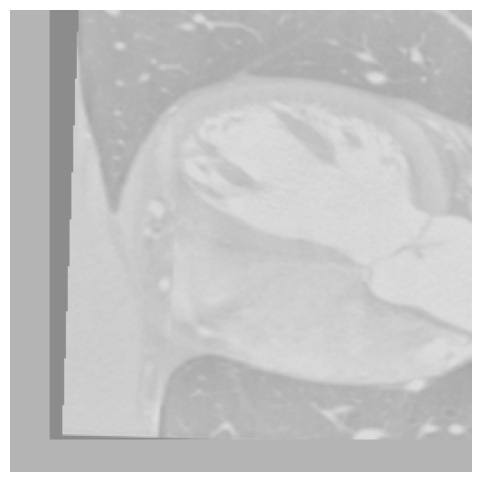

After transforms augmentation shape:  (256, 256, 3)
(256, 256, 3)
(3, 256, 256)


In [80]:
img_aug_list = []
img_aug_ori = img
img_aug_ori = np.expand_dims(img_aug_ori, -1)
img_aug_ori = np.tile(img_aug_ori, [1,1,3])
img_aug_ori = (img_aug_ori + 1) * 127.5

for i in range(5):
    img_aug = img_aug_ori.copy()
    img_aug = Image.fromarray(img_aug.astype('uint8'))
    img_aug = transform_aug(img_aug)
    print(img_aug)
    img_aug = np.array(img_aug, dtype=np.uint8)
    viz_array(img_aug)
    print('After transforms augmentation shape: ', img_aug.shape)
    img_aug = img_aug[:, :, ::-1].copy()
    print(img_aug.shape)
    img_aug = img_aug - img_mean
    img_aug = np.transpose(img_aug, (2, 0, 1))
    print(img_aug.shape)
    # viz_array(img_mean)

In [73]:
img_ = img.copy()
img_ = Image.fromarray(img_.astype('uint8'))

# individual transforms
transform1 = transforms.ColorJitter(brightness=0.9, contrast=0.9, saturation=0.9, hue=0.5)
img_ = transform1(img_)
print(img_)

<PIL.Image.Image image mode=L size=256x256 at 0x7EFEFB13F370>


In [74]:
transform2 = transforms.RandomGrayscale(p=0.4)
img_ = transform2(img_)
print(img_)

<PIL.Image.Image image mode=L size=256x256 at 0x7EFEFB13F370>
